In [1]:
import sys
# please insert the glycompare to the PATH
sys.path.insert(0, '/Users/apple/PycharmProjects/GlyCompare/')

In [2]:
import os
from importlib import reload

import pandas as pd
import seaborn as sns

from glycompare import *
import matplotlib.pyplot as plt
from copy import deepcopy
# reload(pipeline_functions)
%matplotlib inline


Thanks for using the GlyCompare, 
Please check our github for the latest update.


Bokan & Ben,
07/21/2019




# Initialization


    04/02/2019 need to approve parse the meta table, glycan id (unresolved)
    04/14/2019 modified for the paper 


In [3]:
# parameter setting 
# environment parameter setting 
glycompare_addr = '/Users/apple/PycharmProjects/GlyCompare/'
glytoucan_db_addr = os.path.join(glycompare_addr, 'glycompare','database', 'glytoucan_database.json')
# __init__.num_processors = 4
# __init__.exact_Ture = False
linkage_specific = False
num_processors = 8
# project parameter
working_addr = '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/'
project_name = "paper_epo"
costumized_glycan_identifier = True
external_profile_naming= True

# initiator
keywords_dict = pipeline_functions.load_para_keywords(project_name, working_addr, glytoucan_db_addr=glytoucan_db_addr)
keywords_dict

{'external_profile_naming_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/source_data/external_profile_naming.json',
 'glycan_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/intermediate_file/paper_epo_glycan_dict.json',
 'glycan_motif_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/intermediate_file/paper_epo_glycan_motif_dict.json',
 'glycoct_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/source_data/glycoct/',
 'glycoprofile_list_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/intermediate_file/paper_epo_glycoprofile_list.json',
 'glytoucan_db_addr': '/Users/apple/PycharmProjects/GlyCompare/glycompare/database/glytoucan_database.json',
 'intermediate_dir': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/intermediate_file/',
 'matched_dict_addr': '/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/intermediate_file/paper_epo_matched_

In [4]:
pipeline_functions.check_init_dir(keywords_dict)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory


In [5]:
meta_name = pd.read_csv(os.path.join(working_addr,'source_data','glycan_id_list.txt'), sep='\t')
structure_loader = meta_name['glycan_id'].tolist()
data_type = 'mix'
glycan_dict = pipeline_functions.load_glycans_pip(keywords_dict=keywords_dict,
                                           data_type=data_type, 
                                           structure_loader=structure_loader)

Check if the required files exist
files checked
Check if the required files exist
files checked
Successfully created the directory need, please add the source file is the directory
end loading glycoct from  /Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/source_data/glycoct/
loading glytoucan_database from  /Users/apple/PycharmProjects/GlyCompare/glycompare/database/glytoucan_database.json
adding G60415BS
adding G49721VX
adding G07483YN
adding G39213VZ
adding G12398HZ
adding G80858MF
adding G24987DS
adding G58667NI
adding G36191CD
adding G80393PG
adding G39439UR
adding G04483SK
adding G52428MJ
adding G03445UI
adding G00176HZ
adding G23295TF
adding G10691MJ
adding G79457WN
adding G30460NZ
adding G07568IR
adding G00536FZ
adding G39764AC
adding G79412GP
adding G37597FW
adding G17689DH
adding G88127MB
adding G40242TG
adding G20924UR
adding G54953LX
adding G39813YP
adding G88966ZO
adding G54338PJ
adding G10292TC
adding G75308SV
adding G05098FE
adding G76812VG
adding G80264ZA


In [7]:
reload(pipeline_functions)
matched_dict = pipeline_functions.extract_and_merge_substrutures_pip(keywords_dict, num_processors=num_processors,linkage_specific=linkage_specific, forced=False)

start glycan_dict
finished glycan deconvolution


In [6]:
reload(pipeline_functions)
# print(keywords_dict['name_to_id_addr'])
abd_table = glycan_io.load_table(os.path.join(keywords_dict['source_dir'], 'abundance_table.xls'))

_, glycoprofile_list = pipeline_functions.glycoprofile_pip(keywords_dict, 
                                                           abd_table, 
                                                           unique_glycan_identifier_to_structure_id=False, 
                                                           already_glytoucan_id=False,
                                                           external_profile_naming=True, 
                                                           forced=False)

abd_list 57 profile_list 34
57 34


## We only chose 16 glycoprofiles out of 34 glycoprofiles
    1. There are 34 glycoprofiles in original paper. Yang, Z. et al. Engineered CHO cells for production of diverse, homogeneous glycoproteins. Nat. Biotechnol. 33, 842–844 (2015). 
    2. We only chose 16 gycoprofiles that overlap with glycoprofiles in Čaval, T., Tian, W., Yang, Z., Clausen, H. & Heck, A. J. R. Direct quality control of glycoengineered erythropoietin variants. Nat. Commun. 9, 3342 (2018). Both data are from the same lab. 
    3. We are compareing the similarity of clustering results and showed the clustering difference in supplementary figure S2.


In [7]:
_name_dict = json_utility.load_json('/Users/apple/PycharmProjects/GlyCompare/example_data/paper_epo/source_data/external_profile_naming.json')
selected_name_list = ["EPO127.mgat1.",
"EPO174.mgat2.",
"EPO266.fut8.",
"st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
"mgat4A.mgat4B.mgat5",
"B3gnt2.mgat4a.mgat4b.mgat5",
"st3gal4.st3gal6",
"B4GalT1",
"B4GalT2",
"B4GalT3",
"WT",
"B4GalT4",
"EPO78.mgat4B.",
"mgat4A.mgat4B",
"mgat5"]

select_col=[]
_ = {}
for i,j in _name_dict.items():
    _[j] = i
    
for i in selected_name_list:
    select_col.append(_[i])
print(select_col)

['30', '25', '34', '21', '22', '5', '20', '18', '6', '7', '8', '1', '9', '28', '3', '4']


In [8]:
feature_name = []
profile_name = []

selected_profile = [30, 25, 34, 21, 22, 5, 20, 18, 6, 7, 8, 1, 9, 28, 3, 4]
for i in selected_profile:
    profile_name.append(_name_dict[str(i)])
    for j in glycoprofile_list[i-1].glycan_id_list:
        feature_name.append(j)

feature_name = list(set(feature_name))
print(feature_name)
print(selected_profile)
print(profile_name)

['G80264ZA', 'G05098FE', 'G39764AC', '3865.1', 'G20924UR', 'G37597FW', '3457.1', '4587.1', 'G39439UR', '2605.1', 'G07483YN', 'G23295TF', '2967.1', 'G07568IR', 'G76812VG', 'G04483SK', 'G75308SV', 'G00176HZ', 'G10691MJ', 'G05203UQ', 'G85809SI', 'G17689DH', '5486.1', 'G12398HZ', 'G49604DB', 'G56516KW', 'G40242TG', 'G60415BS', 'G88966ZO', 'G54338PJ', 'G80858MF', '4675.1', '3055.1', 'G86696LV', 'G88127MB', '2401.1', '3416.3', 'G80393PG', 'G99891PR', '3416.1', '1754.1', '5312.1', 'G79412GP', 'G54953LX', 'G58667NI', 'G30460NZ', 'G49721VX', '4041.1', 'G90130AG', '2693.2', 'G39813YP', 'G79457WN', '3592.1', 'G09280JF', '3416.2']
[30, 25, 34, 21, 22, 5, 20, 18, 6, 7, 8, 1, 9, 28, 3, 4]
['EPO127.mgat1.', 'EPO174.mgat2.', 'EPO266.fut8.', 'st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'mgat4A.mgat4B.mgat5', 'B3gnt2.mgat4a.mgat4b.mgat5', 'st3gal4.st3gal6', 'B4GalT1', 'B4GalT2', 'B4GalT3', 'WT', 'B4GalT4', 'EPO78.mgat4B.', 'mgat4A.mgat4B', 'mgat5']


# Raw glycan clustering plot for Fig 2a and Fig S1, 52/77 of glycans in 16 glycoprofiles has non-zero abundance 
### Note: the order of rows and columns might be different from the plots in paper while the hierachy remain stable, because the orders are automatically arranged by algorithm.

In [9]:
import pandas as pd
import numpy as np
abundance_table = np.zeros((len(feature_name), len(selected_profile)))
for i in range(len(selected_profile)):
    _profile_idex = selected_profile[i]-1
    _profile_dict = dict(zip(glycoprofile_list[_profile_idex].glycan_id_list, glycoprofile_list[_profile_idex].relative_abundance))
    
    for j in range(len(feature_name)):
        if feature_name[j] in _profile_dict:
            abundance_table[j,i] = _profile_dict[feature_name[j]]
index_list = []
for i in range(len(abundance_table)):
    if sum(abundance_table[i,:])!=0:
        index_list.append(i)
# len(index_list)
abundance_table = abundance_table[index_list,:]

#     abundance_table[i] = abundance_table[i]/sum(abundance_table[i])
feature_name=[feature_name[i] for i in index_list]
pd_table = pd.DataFrame(abundance_table, columns=profile_name, index=feature_name)
pd_table.head()


,EPO127.mgat1.,EPO174.mgat2.,EPO266.fut8.,st3gal4.st3gal6.mgat4a.mgat4b.mgat5,KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5,mgat4A.mgat4B.mgat5,B3gnt2.mgat4a.mgat4b.mgat5,st3gal4.st3gal6,B4GalT1,B4GalT2,B4GalT3,WT,B4GalT4,EPO78.mgat4B.,mgat4A.mgat4B,mgat5
G80264ZA,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,15.92,0.00,0.0,0.00,0.0,0.0,0.0,0.0
G05098FE,0.0,0.0,83.29,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
G39764AC,0.0,0.0,28.18,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
3865.1,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,54.26,61.4,53.12,0.0,0.0,0.0,0.0
G20924UR,0.0,0.0,0.00,0.0,0.0,0.0,0.0,100.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0


In [10]:
for i in pd_table.columns:
#     print(i,pd_table[i], sum(pd_table[i]))
    pd_table[i] = pd_table[i]/sum(pd_table[i])
#     print(pd_table[i])
pd_table.head()

,EPO127.mgat1.,EPO174.mgat2.,EPO266.fut8.,st3gal4.st3gal6.mgat4a.mgat4b.mgat5,KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5,mgat4A.mgat4B.mgat5,B3gnt2.mgat4a.mgat4b.mgat5,st3gal4.st3gal6,B4GalT1,B4GalT2,B4GalT3,WT,B4GalT4,EPO78.mgat4B.,mgat4A.mgat4B,mgat5
G80264ZA,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.041328,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
G05098FE,0.0,0.0,0.239759,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
G39764AC,0.0,0.0,0.081119,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3865.1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.122251,0.159825,0.174238,0.0,0.0,0.0,0.0
G20924UR,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.406901,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


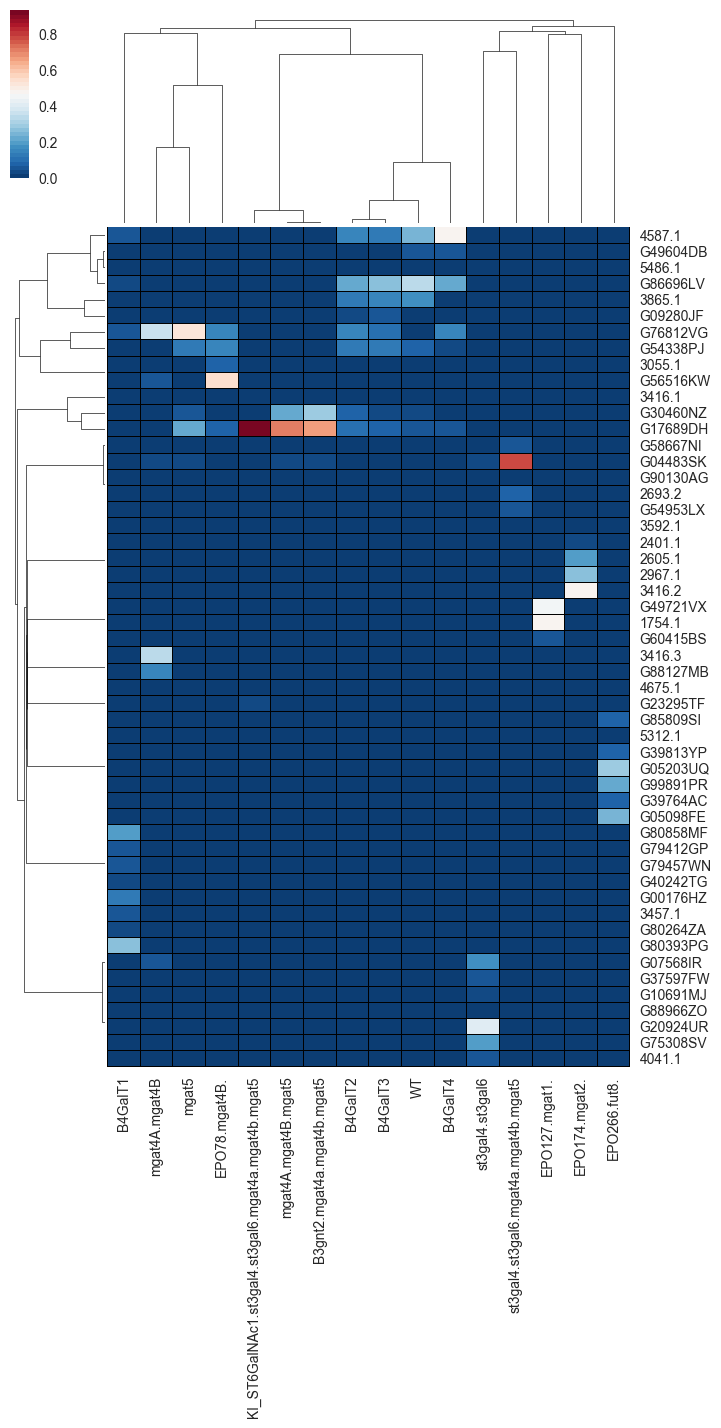

In [11]:
name_prefix = 'full_glycan'
# pd_table.to_csv('/Users/apple/PycharmProjects/Glycompare/paper_supplementory/data_generator/paper_epo/intermediate_file/glycan_abd_table.xls')

cmap = sns.color_palette("RdBu_r", 40)
# g = sns.clustermap(pd_table.round(3), metric="correlation", cmap=cmap, linewidths=.01, annot=False, figsize=(7,7),method='complete')
# plt.savefig(keywords_dict['plot_output_dir']+'raw_glycan_cluster.eps')
g = sns.clustermap(pd_table.round(3), metric="correlation", cmap=cmap, linewidths=.01
                   , figsize=(8,14), linecolor='black', method='complete')
plt.savefig(keywords_dict['plot_output_dir']+'raw_glycan_cluster_no_anno.eps')
# clustering_analysis_pip.draw_profile_cluster(g, pd_table, profile_name, color_threshold=0.95)

# load substructure_abd table

the glycan core is
<class 'str'>
start motif_with core
len 5
len 6
len 7
len 8
len 9
len 10
len 11
len 12
len 13
len 14
len 15
len 16
len 17
len 18
len 19
len 20
len 21
len 22
Finish the n-glycan match  722  motifs are matched to the n-glycan core
start building dependence_tree
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
Start dropping nodes with weight zero, nodes count: 722
Nodes left [96, 139, 140, 199, 200, 201, 282, 283, 284, 285, 390, 391, 392, 393, 394, 395, 396, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1105,

(120, 16)

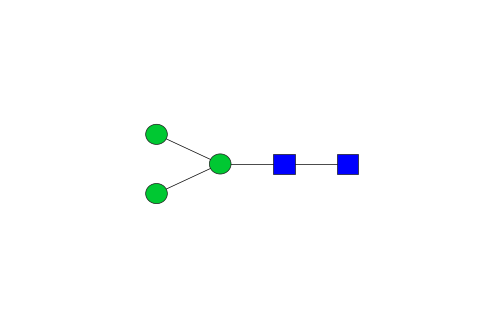

In [12]:
reload(pipeline_functions)
core=select_motifs.nglycan_core
motif_abd_table, motif_lab, merged_weights_dict=pipeline_functions.select_motifs_pip(keywords_dict, 
                                                     linkage_specific=linkage_specific,   
                                                                                     core=core,
                                                     only_substructures_start_from_root=True,
                                                     select_col= select_col)
motif_abd_table.shape

# Raw clustering plot for Figure 2b
### Note: the order of rows and columns might be different from the plot in paper while the hierachy remain stable, because the orders are automatically arranged by algorithm.
### Note: the raw clustering plot for Figure S3 and S4 are also included.

<Figure size 600x400 with 0 Axes>

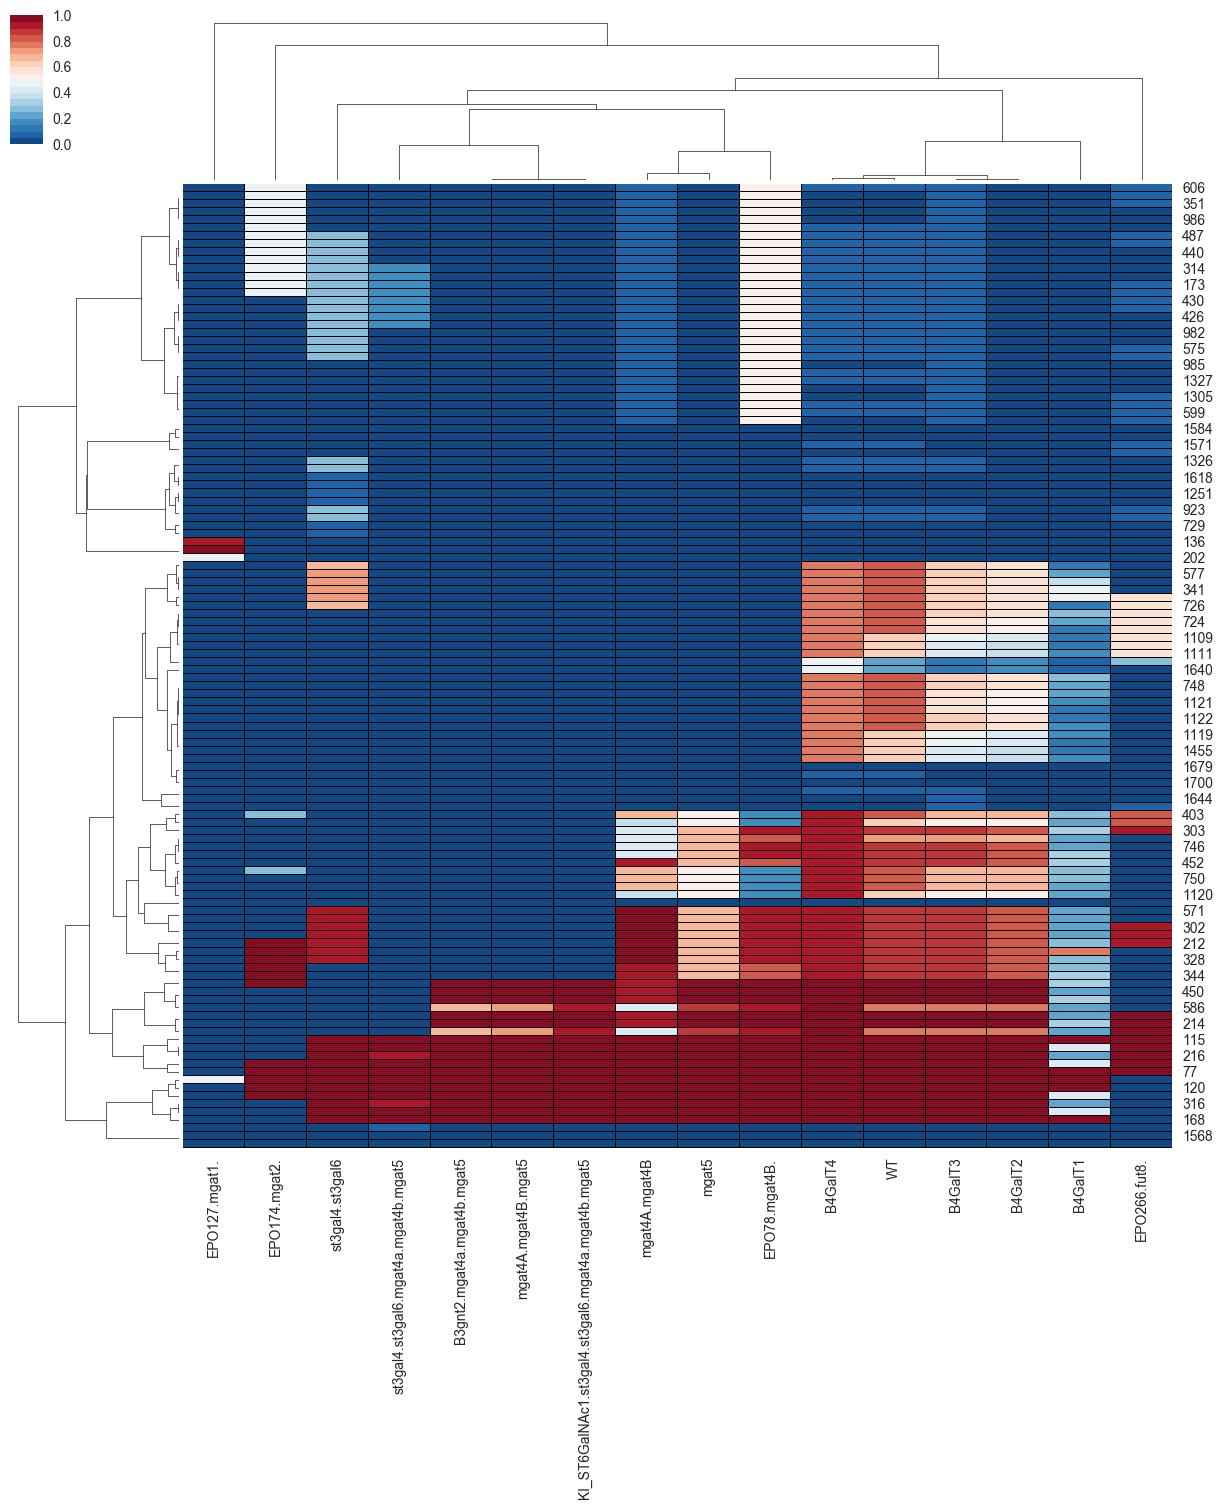

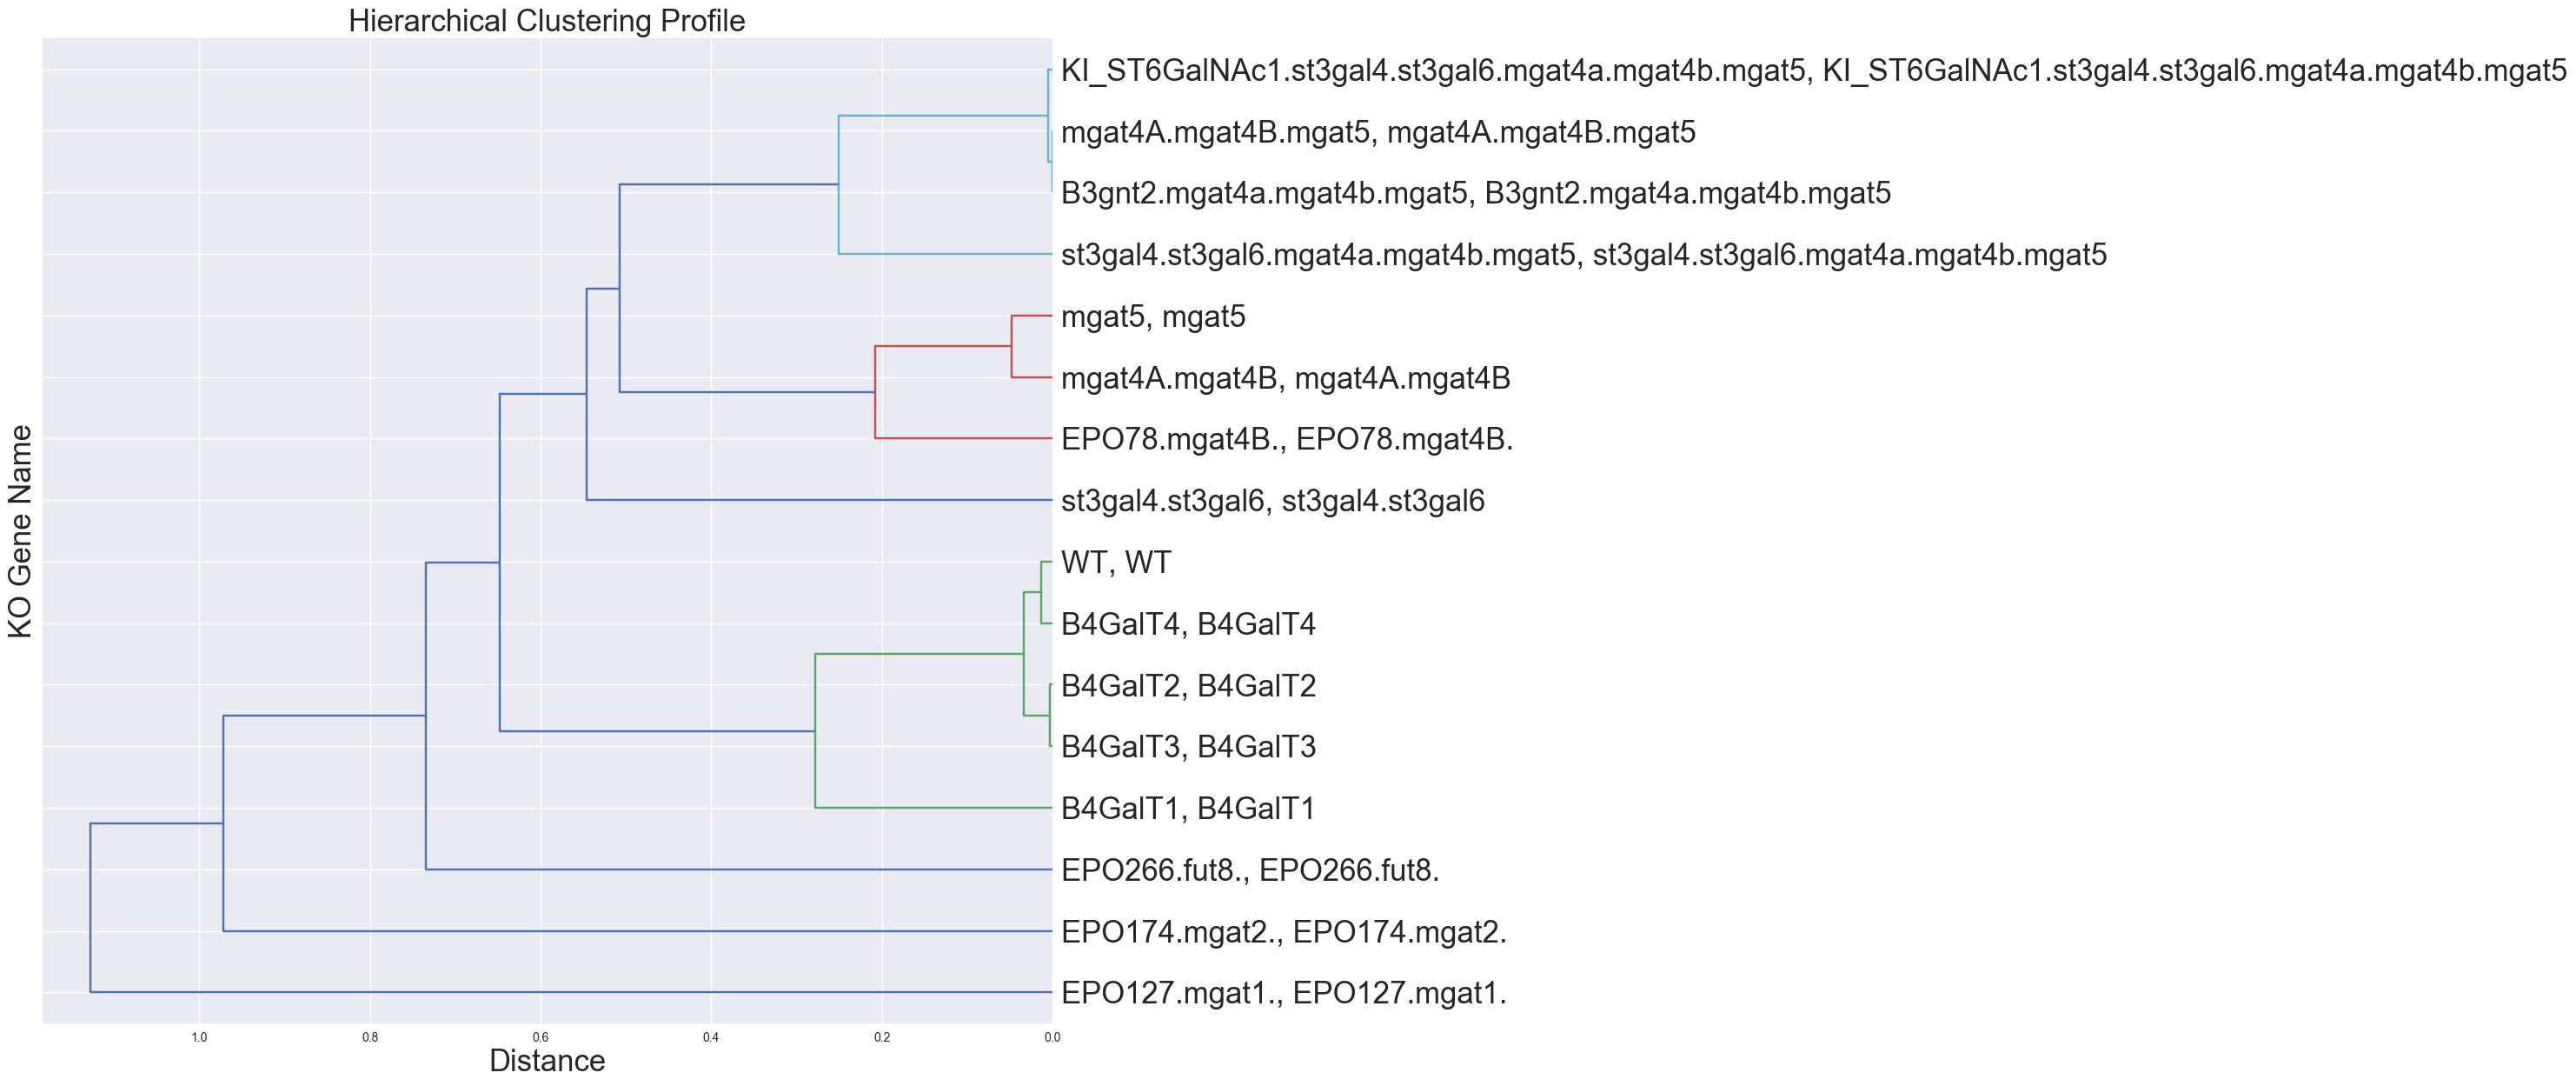

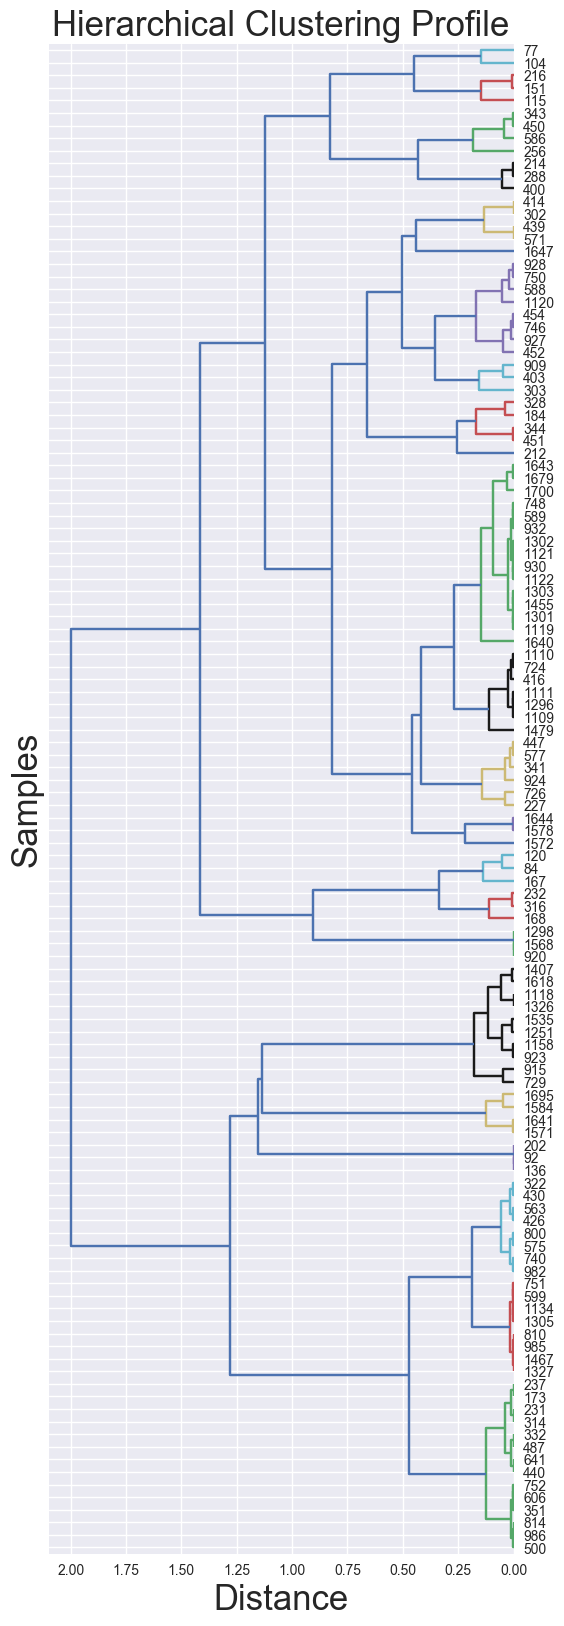

In [13]:
glycoprofile_cluster_dict, glyco_motif_cluster_dict = pipeline_functions.clustering_analysis_pip(keywords_dict=keywords_dict, 
                                           motif_abd_table=motif_abd_table, 
                                           select_profile_name = selected_name_list)

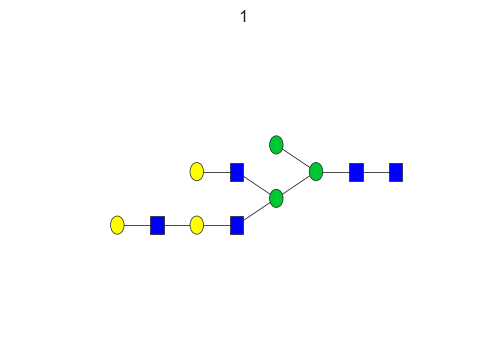

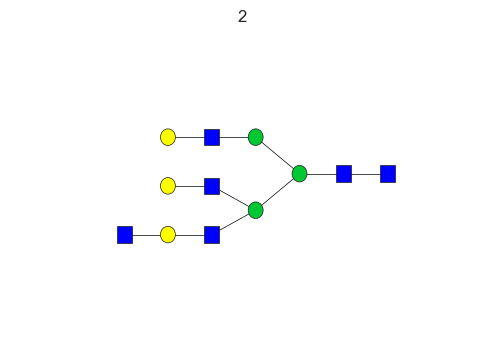

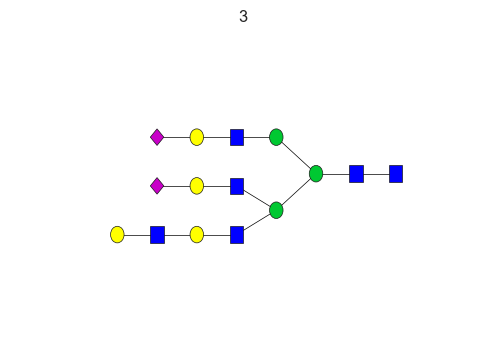

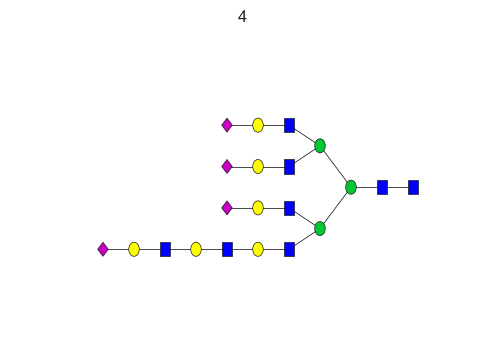

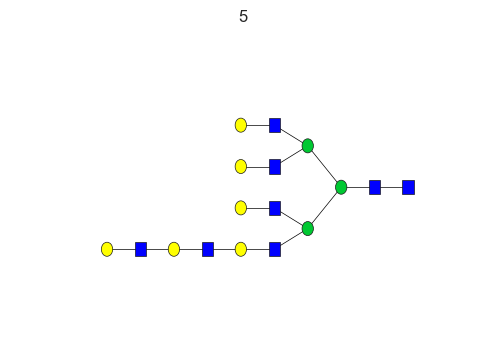

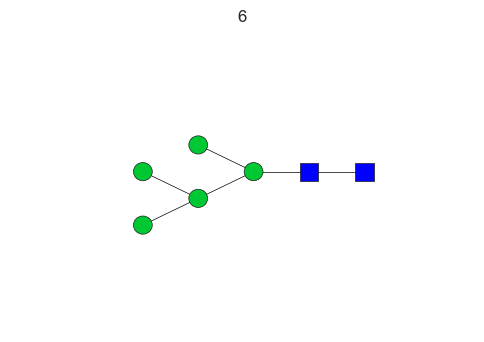

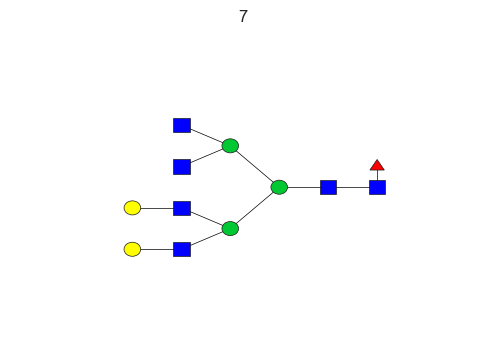

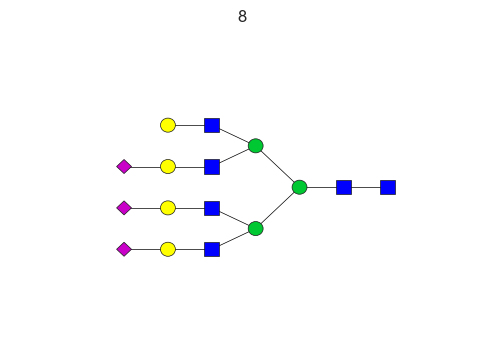

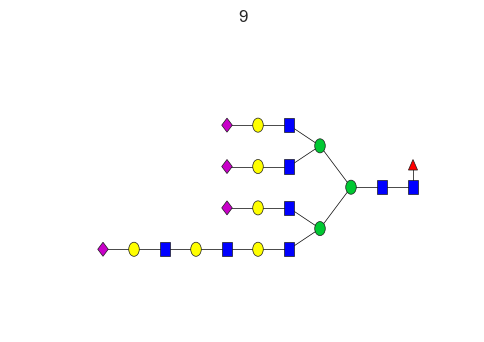

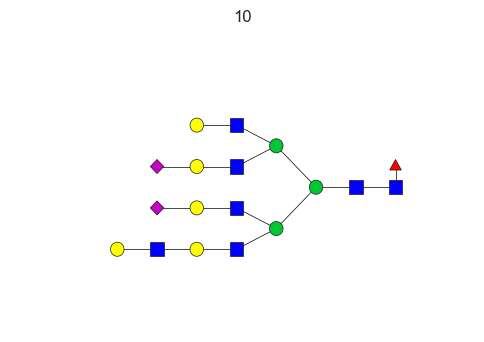

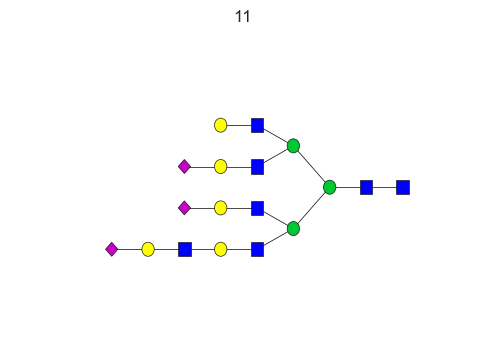

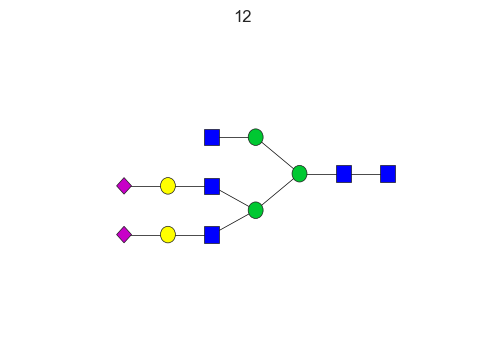

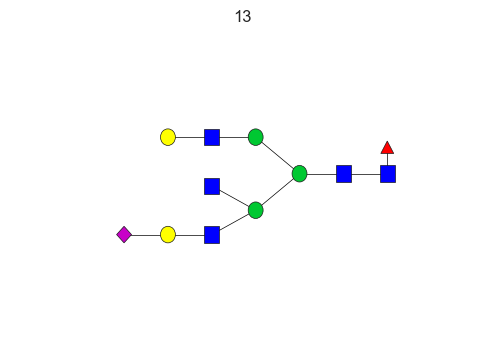

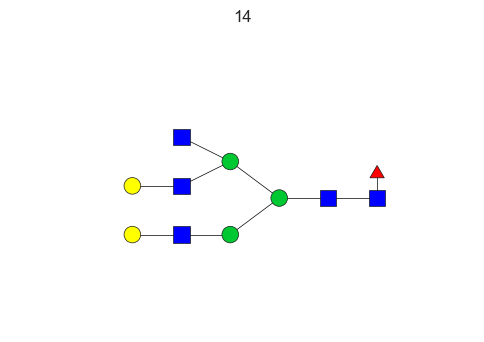

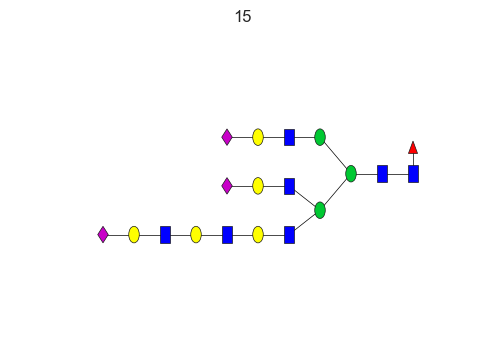

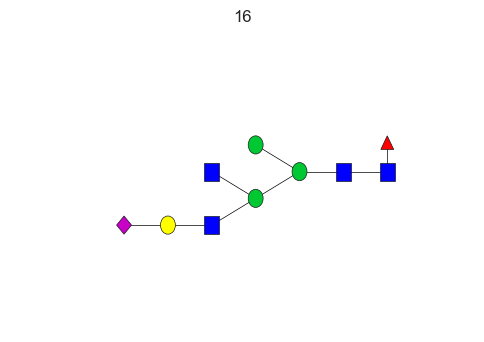

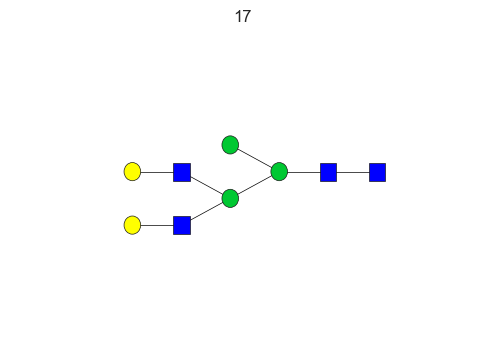

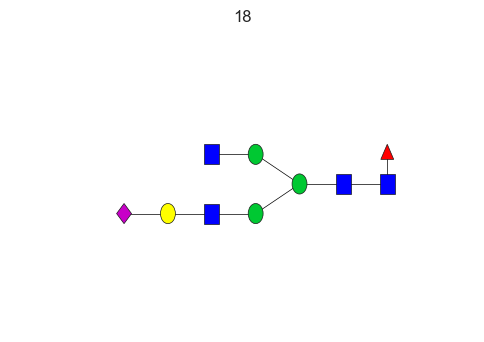

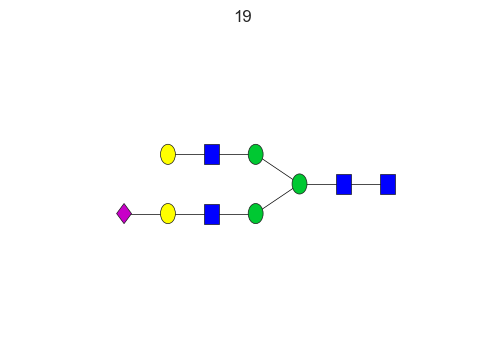

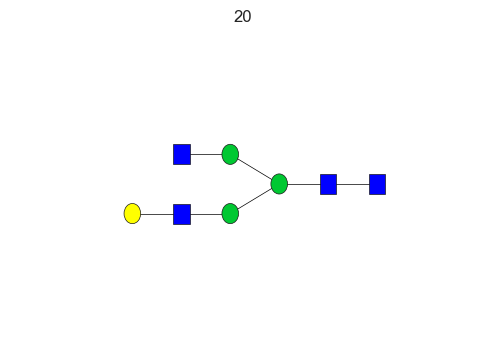

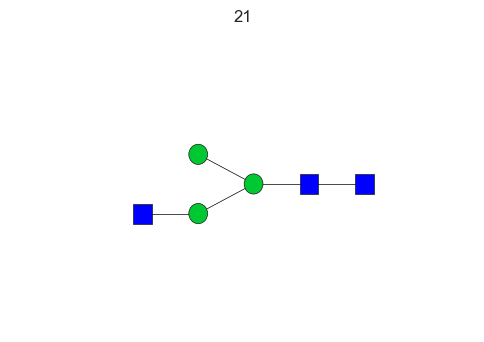

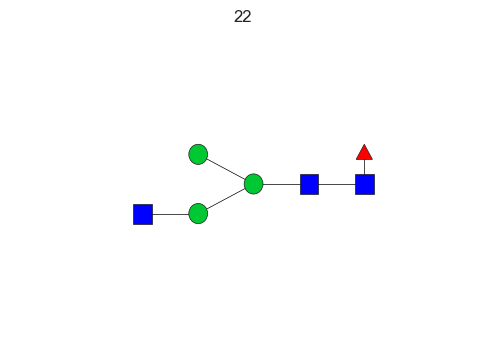

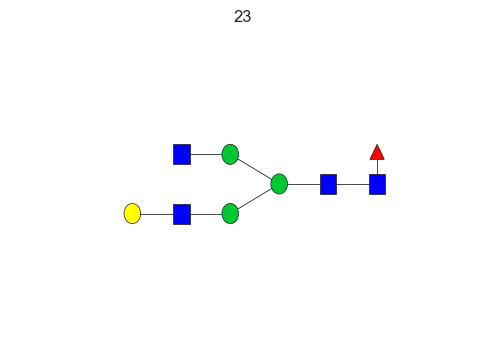

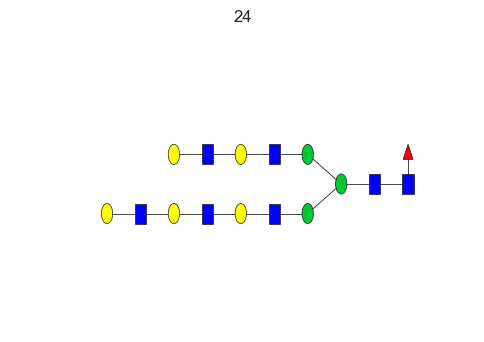

In [36]:
pipeline_functions.draw_substructure_representative_pip(glyco_motif_cluster=glyco_motif_cluster_dict,
                                                        substructure_vec=motif_lab.motif_vec,
                                                        motif_weights_dict=merged_weights_dict,
                                                        plot_all_substructure=False,
                                                        address_dir=keywords_dict['plot_output_dir'],
                                                        threshold=0.51,
                                                        plot_rep=True)

In [37]:
# import seaborn as sns
# import clustering_analysis
# import scipy
# from copy import deepcopy
# reload(clustering_analysis)
# # sns.set("RdBu_r", 7)
# # dropper.drop_node()
# # print("", len(dropper.drop_node()))
# # # motif_abd_table =  substructure_abd_table[_table_col]


# if 51 in mod_nodes:
#     mod_nodes.remove(51)
# # print(motif_abd_table.head())
# df_ncore = deepcopy(motif_abd_table)
# # print(sorted(mod_nodes))
# print(df_ncore.shape)
# # draw plot
# # motif_with_n_glycan_core_all_motif(motif_, _table, weight_dict)
# """ with n_glycan_core using jaccard for binary and use braycurtis for float
# """
# df_ncore.columns=selected_name_list
# from sklearn import preprocessing
# import numpy as np
# import matplotlib.pyplot as plt

# # df_ncore=pd.DataFrame(data=preprocessing.scale(df_ncore.transpose()).transpose(), index=df_ncore.index, columns=df_ncore.columns)
# df_ncore.to_csv(os.path.join(keywords_dict['intermediate_dir'], str(len(selected_name_list))+r"selected_abundance_matrix.txt"))
# motif_abd_table.colmuns=selected_name_list
# # motif_abd_table.to_csv(__init__.json_address + r"full_abundance_matrix.txt")
# name_prefix = 'dropped'
# # sns.palplot(sns.color_palette("RdBu_r", 7))
# cmap = sns.color_palette("Reds", 25)
# g = sns.clustermap(df_ncore, metric="correlation", cmap=cmap, linewidths=.02, figsize=(20,20),linecolor='black', method='complete')
# plt.savefig(keywords_dict['plot_output_dir']+'pseudo_profile_clustering.svg')
# # clustering_analysis.draw_profile_cluster(g, df_ncore, selected_name_list, name_prefix, color_threshold=0.5, address=keywords_dict['plot_output_dir']+'profile_clustering.svg')
# # cccluster_dict = clustering_analysis.draw_motif_cluster(g, df_ncore, name_prefix, color_threshold=0.185, fig_size=(6, 20))

 

# Role substructure representative abundance table for Fig 2c and Fig 2d 
## Note: Since clusters in cluster map are automatically ordered by searborn, I reorder the clusters with n-glycan features without significantly changing the cluster hierarchy.

## branch: 1-> 4
## galactose: 1-> 4
## sialyation: 1-> 4
## fucose: 0 -> 1

We tested that these 24 clusteres in different computers might have different indexs. But only indexs have inconsistency. 

rearanged_list = [21,22,20,23,18,16,17,19,13,1,14,12,2,3,15,7,8,10,11,5,4,9,24,6]


In [14]:
profile_dict={1:["EPO127.mgat1."],
2:["EPO174.mgat2."],
3:["EPO266.fut8."],
4:["KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "st3gal4.st3gal6.mgat4a.mgat4b.mgat5",
   "B3gnt2.mgat4a.mgat4b.mgat5",
   "mgat4A.mgat4B.mgat5",
   ],
5:["st3gal4.st3gal6"],
6:["mgat5",
   "mgat4A.mgat4B",
   "EPO78.mgat4B."],
7:["B4GalT1",
   "B4GalT2",
   "B4GalT3",
   "B4GalT4",
   "WT",]}


rearanged_list = [21,22,20,23,18,16,17,19,13,1,14,12,2,3,15,7,8,10,11,5,4,9,24,6]



profile_Gly=[]
profile_name_order = []
for i in range(1,len(profile_dict)+1):
    for j in profile_dict[i]:
        profile_Gly.append(j)
        profile_name_order.append(j)
def generate_weight(vec_, merged_weights_dict):
    weight_vec = [merged_weights_dict[i] for i in vec_]
    _sum =sum(weight_vec)
    return [i/_sum for i in weight_vec]


substructure_table = np.zeros((len(glyco_motif_cluster_dict),16))
for i in range(1,len(glyco_motif_cluster_dict)+1):
    temp_table =  deepcopy(motif_abd_table[profile_name_order][motif_abd_table.index.isin(glyco_motif_cluster_dict[i])])
    temp_table = np.array(temp_table)
    _weight_vec = generate_weight(sorted(glyco_motif_cluster_dict[i]),merged_weights_dict)
    _substructure_vec = np.zeros((1,16))
    for idex, j in enumerate(temp_table):
        _substructure_vec += j*_weight_vec[idex]
#     scaler = preprocessing.StandardScaler().fit(temp_table)
    substructure_table[i-1,] = _substructure_vec[0,]


In [15]:
reorder_glycoprofile_table = np.zeros(motif_abd_table.shape)
_cur_row = 0
_index = []
for i in sorted(list(glyco_motif_cluster_dict), reverse=True):
    temp_table =  deepcopy(motif_abd_table[profile_name_order][motif_abd_table.index.isin(glyco_motif_cluster_dict[i])])
    _index.extend(glyco_motif_cluster_dict[i])
    temp_table = np.array(temp_table)
#     _weight_vec = generate_weight(sorted(glyco_motif_cluster_dict[i]),merged_weights_dict)
    for j in range(temp_table.shape[0]):
        reorder_glycoprofile_table[_cur_row]=temp_table[j]
        _cur_row+=1
#     _substructure_vec = np.zeros((1,16))
#     for idex, j in enumerate(temp_table):
#         _substructure_vec += j*_weight_vec[idex]
# #     scaler = preprocessing.StandardScaler().fit(temp_table)
#     substructure_table[i-1,] = _substructure_vec[0,]
cluster_table_redraw = pd.DataFrame(data=reorder_glycoprofile_table, index=_index, columns=profile_name_order).transpose()
# cluster_table_redraw
# fig, ax = plt.subplots(figsize=(16,10))
# # cmap = sns.color_palette("Reds", 40)
# # cmap=sns.color_palette("RdBu_r", 20)
# sns.heatmap(cluster_table_redraw.round(2), ax=ax, annot=False, cmap=sns.color_palette("Reds", 25), linewidths=.01, linecolor='black')
# plt.tight_layout()
# plt.savefig(keywords_dict['plot_output_dir']+'/raw_abundance_glycoprofile_redraw.eps')


# Figure 2c Substructure representative table

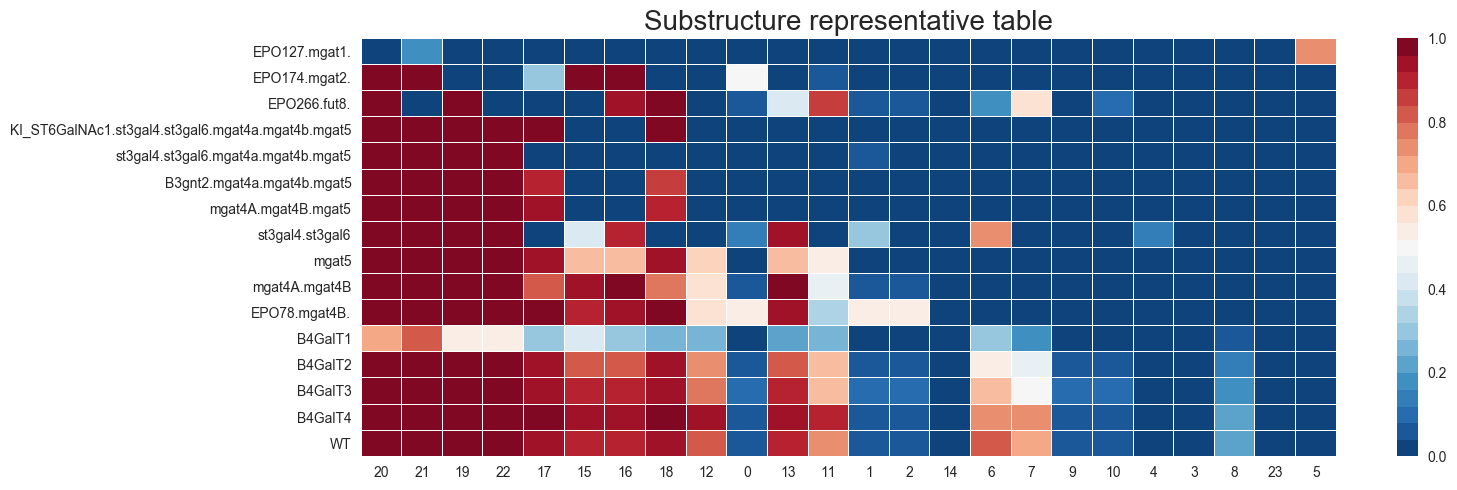

In [33]:
from scipy.stats import zscore

substre_profile=pd.DataFrame(data=substructure_table.transpose(), index=profile_name_order)
substre_profile=substre_profile[[i-1 for i in rearanged_list]]
fig, ax = plt.subplots(figsize=(16,5))
substre_profile.to_csv(keywords_dict['intermediate_dir']+"/abundance_representatives.csv")
sns.heatmap(substre_profile.round(2), ax=ax, cmap=sns.color_palette("RdBu_r", 25), linewidths=.01, linecolor='white')
substre_profile.round(2).to_csv(os.path.join(keywords_dict['intermediate_dir'], str(len(selected_name_list))+r"substre_profile.txt"))
plt.title('Substructure representative table', size=20)
plt.tight_layout()
plt.savefig(keywords_dict['plot_output_dir']+'/raw_abundance_sub.eps')
plt.show()
# substre_profile_zscore.round(2).to_csv(os.path.join(keywords_dict['intermediate_dir'], str(len(selected_name_list))+r"substre_profile_zscore.txt"))

# plt.tight_layout()
# plt.savefig(keywords_dict['plot_output_dir']+'/raw_abundance_sub_shifted.eps')
# plt.show()

In [32]:
# from scipy.stats import shapiro, anderson, boxcox
from scipy.stats import yeojohnson, probplot, wilcoxon
from scipy import stats
# scipy.stats.anderson
# reload(stats)
# reload()
# fig = plt.figure()
# ax1 = fig.add_subplot(111)
# for i in substre_profile.columns:
# #     print(anderson(substre_profile[i]), 'expon')
#     print(wilcoxon(substre_profile[i]),)
#     prob = stats.probplot(xt, dist=stats.norm)
# #     plt.show()
# fig = plt.figure()
# ax1 = fig.add_subplot(211)
# i = substre_profile.columns[0]
# #     print(anderson(substre_profile[i]), 'expon')
# xt,_lambda = yeojohnson(substre_profile[i])
# prob = stats.probplot(xt, dist=stats.norm,plot=ax1)
# plt.show()
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
i = substre_profile.columns[0]
print(bs.bootstrap(np.array(substre_profile[i]), stat_func=bs_stats.mean))
print(bs.bootstrap(np.array(substre_profile[i]), stat_func=bs_stats.std))


0.917717879819689    (0.8362868944858399, 1.0605196303257642)
0.2475085101070228    (0.10507269806728303, 0.4929314036237946)


# Selected the example for Figure 2d, 3

In [42]:
import numpy as np
import matplotlib.pyplot as plt
#  matplotlib.rc('xtick', labelsize=20) 
# matplotlib.rc('ytick', labelsize=20)
def compare_profile(profile_table, name_list, ax, addr=None):
    # data to plot

    # create plot
    profile_table.columns=name_list
#     print('a', profile_table.shape)
#     print('a', profile_table)
#     for i in zip(range(profile_table.shape[0]),profile_table.iloc[:,0]):
#         print(i)
#     print(profile_table.iloc[0,0])
#     print('fini')
    index = np.arange(profile_table.shape[0])
    bar_width = min(0.25, 1/(profile_table.shape[1]+2))
    opacity = 0.8
    rects_list=[0]*profile_table.shape[1]
    if ax is None:
        fig, ax = plt.subplots(figsize=(8 ,3))
        ax.set_facecolor('white')
#         plt
        plt.xlabel('Substructure', size=20)
        plt.ylabel('Relative diff with zscore', size=20)
        plt.title('GlycoProfile Comparison', size=20)
        plt.xlabel('Substructure', size=20)
        plt.ylim(-5,5)
        
        for i,j in enumerate(profile_table.columns):
            plt.bar(index+i*bar_width, profile_table[j], bar_width,
    #                  alpha=opacity,
    #                  color='b',
                     label=str(j))
        plt.legend(name_list, loc=1)
        plt.yticks(size=15)
        plt.axhline(y=0, color='Black', linestyle='-',linewidth=0.1)
        plt.yticks([-4,-2,0,2,4], ['-4','-2','0','2','4'])
        plt.xticks(index-1/(profile_table.shape[1]+2), ([str(x) for x in range(1, profile_table.shape[0]+1)]))
        plt.savefig(addr)
        plt.tight_layout()
    else:
#         print(name_list)
        print('index', index)
        ax.set_facecolor('white')
        ax.set_ylim(-5,5)
#     ax.set_yticklabels(size=15)
        
    
        for i,j in enumerate(profile_table.columns):
            ax.bar(index+i*bar_width, profile_table[j], bar_width,
    #                  alpha=opacity,
    #                  color='b',
                     label=str(j))
        ax.legend(name_list, loc=2)
        ax.set_yticks([-4,-2,0,2,4])
        ax.axhline(y=0, color='Black', linestyle='-',linewidth=0.5)
        ax.set_yticklabels(['-4','-2','0','2','4'])
        ax.set_xticks(index-1/(profile_table.shape[1]+2), )
        ax.set_xticklabels(([str(x) for x in range(1, profile_table.shape[0]+1)]))
    if addr:
        
#     ax.tight_layout()
        plt.savefig(addr)
# compare_profile(substre_profile[])

In [43]:
profile_name_pub={1: ['EPO127.KO_mgat1'],
 2: ['EPO174.KO_mgat2'],
 3: ['EPO266.KO_fut8'],
 4: ['KI_st6gal-I; KO_mgat4a/4b/5_st3gal4/6',
     'KO_st3gal4/6_mgat4a/4b/5',
  'KO_mgat4A/4B/5_B3gnt2',
  'KO_mgat4A/4B/5',
  ],
 5: ['KO_mgat5', 'KO_mgat4A/4B', 'EPO78.KO_mgat4B'],
 6: ['KO_st3gal4/6'],
 7: ['KO_B4GalT1', 'KO_B4GalT2', 'KO_B4GalT3', 'KO_B4GalT4', 'WT']}



# Figure 2d

In [47]:

# fig, axes = plt.subplots(2, 1, squeeze=False, facecolor='white')

# # plt.title(title)
# fig.set_size_inches(8, 6)
# _count = 0
# # _profile_dict={1:["EPO127.mgat1.", "EPO174.mgat2.", "EPO266.fut8.", "st3gal4.st3gal6"]
# # _name_list = [x for x in mod_profile_dict[i]]
# condense_plot = ["EPO266.fut8.", "st3gal4.st3gal6", ]
# condense_plot_name = ['EPO266.KO_fut8','KO_st3gal4/6']
# sns.set(palette='Accent_r')

substre_profile_zscore=substre_profile.apply(zscore)


# fig, ax = plt.subplots(figsize=(16, 5))
# sns.heatmap(substre_profile_zscore.round(2), ax=ax, cmap=sns.color_palette("RdBu_r", 40), linewidths=.01, linecolor='white', annot=True)

if 'B4GalT2' in substre_profile_zscore.columns:
    pass
else:
    substre_profile_zscore = substre_profile_zscore.transpose()
substre_profile_zscore=substre_profile_zscore.round(3)
substre_profile_zscore_with_baseWT = substre_profile_zscore.copy()
base = list(substre_profile_zscore.WT.tolist())
for i in substre_profile_zscore_with_baseWT.columns:
#     print(base)
    substre_profile_zscore_with_baseWT[i]=substre_profile_zscore_with_baseWT[i]-base


# for idex, i in enumerate(condense_plot):
#     #             print(i)
#     #             print(divmod(_count, _a))
#     _name_list = [i]
    
# #     _x, _y = divmod(_count, _len)
#     ax=axes[idex][0]
#     compare_profile(deepcopy(substre_profile_zscore_with_baseWT[_name_list]), [condense_plot_name[idex]], ax=ax)#addr=__init__.plot_output_address+"substructure_cluster_"+str(i)+".eps")
# #     _count += 1
# plt.savefig(keywords_dict['plot_output_dir']+"substructure_cluster_condense.eps")

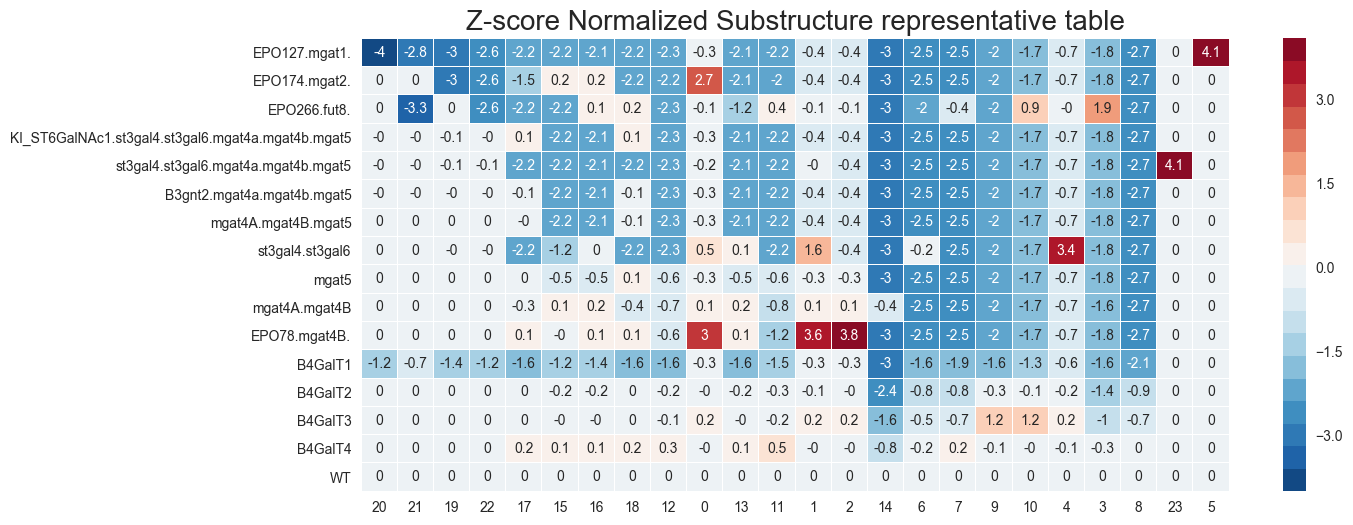

In [48]:
substre_profile_zscore_with_baseWT1=substre_profile_zscore_with_baseWT.transpose()
substre_profile_zscore_with_baseWT1.to_csv(keywords_dict['plot_output_dir']+ r"substructure_matrix_zscore_base.txt")
fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(substre_profile_zscore_with_baseWT1.round(1), annot=True, ax=ax, cmap=sns.color_palette("RdBu_r", 20), linewidths=.005, linecolor='white')
plt.title('Z-score Normalized Substructure representative table', size=20)

plt.savefig(keywords_dict['plot_output_dir']+'adjusted_abundance_zscore.eps')
plt.show()


# Figure 2d

['EPO127.mgat1.']
['EPO174.mgat2.']
['EPO266.fut8.']
['KI_ST6GalNAc1.st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'st3gal4.st3gal6.mgat4a.mgat4b.mgat5', 'B3gnt2.mgat4a.mgat4b.mgat5', 'mgat4A.mgat4B.mgat5']
['st3gal4.st3gal6']
['mgat5', 'mgat4A.mgat4B', 'EPO78.mgat4B.']
['B4GalT1', 'B4GalT2', 'B4GalT3', 'B4GalT4', 'WT']


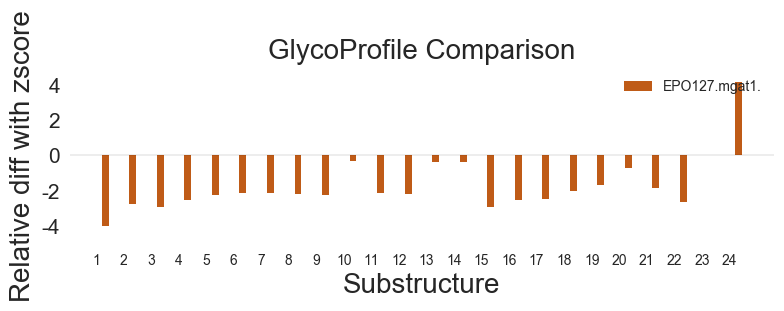

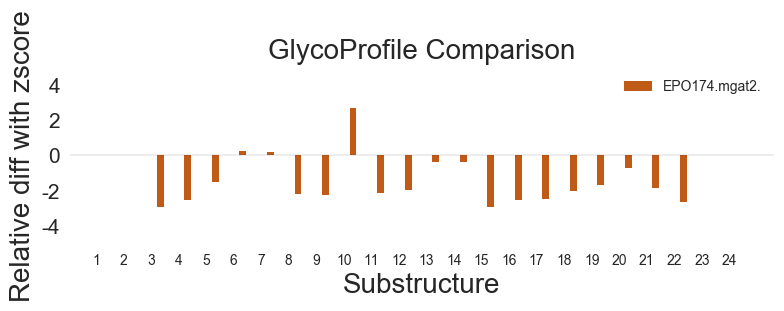

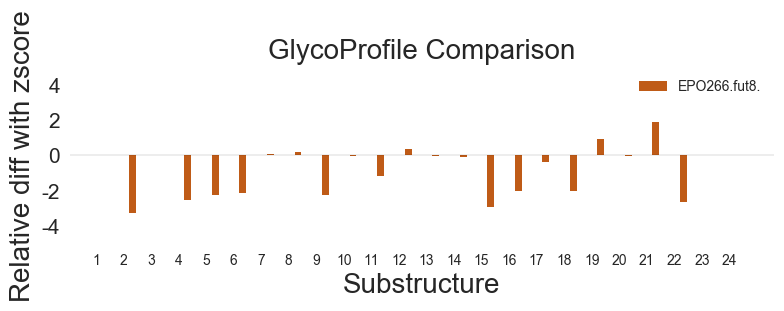

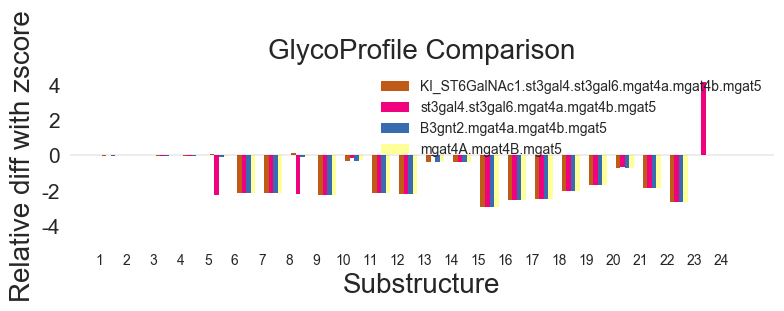

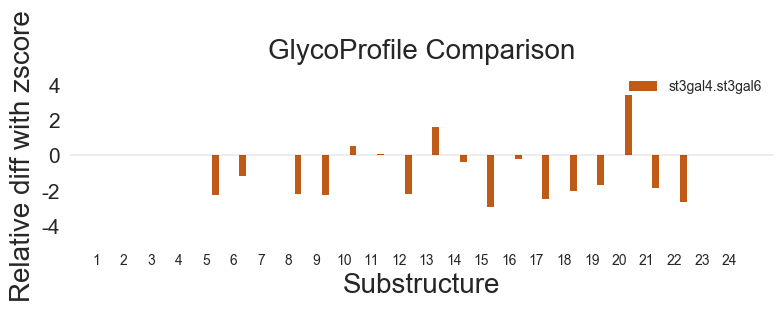

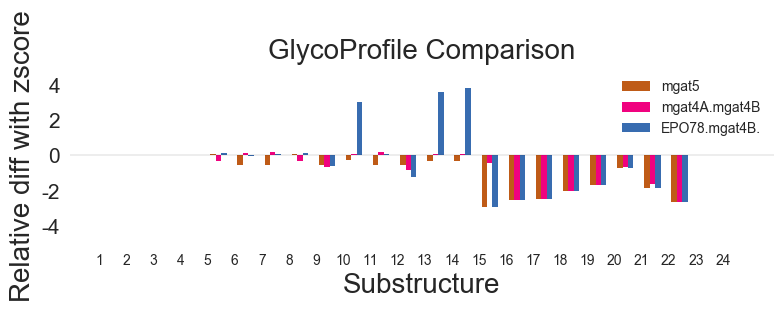

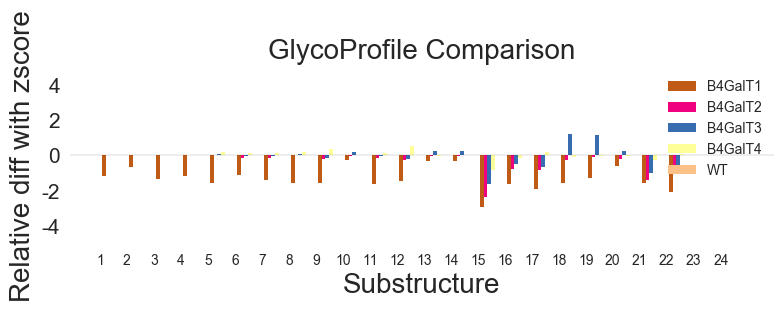

In [160]:

mod_profile_dict=profile_dict
sns.set(palette='Accent_r')
if 'B4GalT2' in substre_profile_zscore.columns:
    pass
else:
    substre_profile_zscore = substre_profile_zscore.transpose()
substre_profile_zscore=substre_profile_zscore.round(3)
substre_profile_zscore_with_baseWT = substre_profile_zscore.copy()
base = list(substre_profile_zscore.WT.tolist())
for i in substre_profile_zscore_with_baseWT.columns:
#     print(base)
    substre_profile_zscore_with_baseWT[i]=substre_profile_zscore_with_baseWT[i]-base
#     print(substre_profile_zscore_with_baseWT[i])
#     print(substre_profile_zscore_with_baseWT[i])
for i in sorted(mod_profile_dict):
#     for j in profile_dict[i]:
    _name_list = [x for x in mod_profile_dict[i]]
#     print(_name_list, len(_name_list))
    print(_name_list)
    compare_profile(deepcopy(substre_profile_zscore_with_baseWT[_name_list]), _name_list, ax=None, addr=keywords_dict['plot_output_dir']+"cluster_rep_abd_zscore"+str(i)+".eps")
    



In [ ]:
# from sklearn.decomposition import PCA as pca
# # Y_sklearn = sklearn_pca.fit_transform(X_std)
# group_list = [1,1,1,2,2,2,2,4,3,3,3,5,5,5,5,5]

In [115]:
# import matplotlib.pyplot as plt
# def _pca(data_table, group_list):
#     sklearn_pca = pca(n_components=3)
#     projected = sklearn_pca.fit_transform(data_table)
#     print(sklearn_pca.explained_variance_ratio_)

#     fig, ax = plt.subplots()
# #     ax.scatter(z, y)


#     plt.scatter(projected[:, 0], projected[:, 1],
#                 c=group_list, edgecolor='none', alpha=0.5,
#                 cmap=plt.cm.get_cmap('Dark2',5), )
#     plt.xlabel('component 1')
#     plt.ylabel('component 2')
#     for i, txt in enumerate(data_table.index.tolist()):
#         ax.annotate(txt, (projected[i, 0]+0.1, projected[i,1]))
#     plt.colorbar();
    


In [116]:
# _pca(substre_profile.round(2), group_list)

In [117]:
# _pca(substre_profile_zscore.round(2), group_list)

In [118]:
# import plotly.plotly as py
# import plotly.graph_objs as go
# import plotly 
# plotly.tools.set_credentials_file(username='hoveathly', api_key='bcBZdP07AvxyJ605DwHM')

In [119]:
# ax.scatter(xs, ys, zs, marker=m)

# plt.colorbar();
# ax.set_xlabel('X Label')
# ax.set_ylabel('Y Label')
# ax.set_zlabel('Z Label')

In [120]:
# for i in substre_profile.index.tolist():
#     print(i)

In [121]:
# # x, y, z = np.random.multivariate_normal(np.array([0,0,0]), np.eye(3), 400).transpose()
# sklearn_pca = pca(n_components=3)
# projected = sklearn_pca.fit_transform(substre_profile)
# trace1 = go.Scatter3d(
#     x=projected[:, 0],
#     y=projected[:, 1],
#     z=projected[:, 2],
#     text=substre_profile_zscore.index.tolist(),
#     mode='markers',
#     marker=dict(
#         size=12,
#         color=group_list,                # set color to an array/list of desired values
#         colorscale='Viridis',   # choose a colorscale
#         opacity=0.8
#     )
# )

# data = [trace1]
# layout = go.Layout(
#     autosize=True,
#     hovermode='closest',
#     showlegend=False,
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )

# )
# fig = go.Figure(data=data, layout=layout)
# py.iplot(fig, filename='3d-scatter-colorscale-2')